---
## Perceptron
#### Language: Python 3.8.8
#### Author: Tianjian Sun
---

### Table of Contents
- [Introduction](#Introduction)
- [Algorithm](#Algorithm)
- [Illustration](#Illustration)
- [Advantages and Disadvantages](#Advantages)
    - [Advantages](#Advantages)
    - [Disadvantages](#Disadvantages)
- [Code of Perceptron](#Code)
- [Applications on data sets](#Applications)
--- 

### Introduction <a class="anchor" id="Introduction"></a>

A [Perceptron](https://en.wikipedia.org/wiki/Perceptron) is an algorithm for supervised learning of binary classifiers. It's a simplified model of a biological neuron, and it is a type of linear classifier, i.e., a classifier that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

The perceptron algorithm was invented in 1958 at the Cornell Aeronautical Laboratory by [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt). It's the origin of support vector machines and multilayer networks.

---

### Algorithm <a class="anchor" id="Algorithm"></a>

#### Perceptron <a class="anchor" id="Perceptron"></a>
First a function that maps input $\mathbf {x}$  (a real-valued vector) to an output value $f(\mathbf {x} )$ (a single binary value) is given by

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
$$

where $\mathbf {w}$  is a vector of real-valued weights, $\mathbf {w} \cdot \mathbf {x} = \sum_{i=1}^{m} {w_{i}x_{i}}$ is the dot product,  $m$ is the number of inputs to the perceptron.

And the algorithm is
1. Initialize random small weights.
2. For each sample $\mathbf{x}_j$ and $y_j$, perform the following steps:
   - Calculate the actual output:
$$
y_j(t) = f[\mathbf{x}_j^T\cdot\mathbf{w}(t)]
$$
   - Update the weights:
$$
\mathbf{w}(t+1) = \mathbf{w}(t) \boldsymbol{+} \cdot  \mathbf{x}_j^T(\mathbf{d} - \mathbf{y}(t))
$$

3. Updates the weights after steps 2, until meets stopping criterias.

---
### Illustration <a class="anchor" id="Illustration"></a>

**Perceptron**

In one sentence, a perceptron is a simplified model of neuron. It consists four parts: inputs, weights, net sum, and activation function. The following image is from [Wikipedia](https://en.wikipedia.org/wiki/Perceptron#/media/File:Perceptron.svg).

<img src="images/Perceptron.svg" alt="drawing" width="400"/>

---
### Advantages and Disadvantages <a class="anchor" id="Advantages"></a>
#### Advantage <a class="anchor" id="Advantages"></a>
- Easy to use and understand.
- Simple
#### Disadvantage  <a class="anchor" id="Disadvantages"></a>
- Cannot create non-linear boundary
- Output can take on only one of two values

---

### Code of Perceptron <a class="anchor" id="Code"></a>

#### import necessary packages
* [numpy](https://numpy.org/)
* [pandas](https://pandas.pydata.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
* [matplotlib](https://matplotlib.org/)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#### function of Perceptron

In [2]:
class Perceptron():
    # initialize
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]

    def sign(self, x, y):
        if x@y>0:
            return 1
        else:
            return -1
        
    def loss(self):
        return sum(0.5*(self.sign(self.weights, x) - self.y[i])**2 for i, x in enumerate(self.X))

    def grad_approx(self, x, y):
        return (self.sign(self.weights, x) - y) * x

    def update_w(self, id):
        self.weights = self.weights - self.gamma * self.grad_approx(self.X[id], self.y[id])
        self.weights_history.append(self.weights)
        return 

    # model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta
        
        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)

        for i in range(1, max_iter+1):
            random_id = np.random.randint(self.n)
            weights = self.update_w(random_id)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter:
                break

    # predict new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        y_hat = [self.sign(x, weights) for x in X]
        return y_hat

---

### Applications on data sets <a class="anchor" id="Applications"></a>

*wine* data set

---

We apply our code on a classification problem. We test KNN on the *wine* data set from *sklearn.datasets*

Load data set, and only choose the first two features and labels. Then change the label of (0, 1) to (1, -1).

In [3]:
X, y = load_wine(return_X_y=True, as_frame=True)
X = X[y!=2]
y = y[y!=2]

for i, label in enumerate(y):
    if label ==0:
        y[i] = 1
    elif label==1:
        y[i] = -1
X = X[['alcohol', 'malic_acid']]

Scale input.

In [4]:
X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(X))
X_scaled.head()

,0,1
0,1.452455,-0.294414
1,0.289066,-0.214558
2,0.243886,0.447106
3,1.610586,-0.020622
4,0.334246,0.709490


Visualize the data points in 2-dimensional figure.

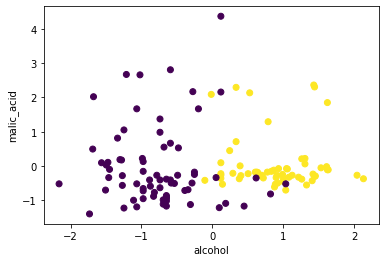

In [5]:
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:,1], c=y)
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()

Split to training and test, and train the model.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=12)
model = Perceptron()
model.fit(X_train, y_train, gamma=0.001, max_iter=1000)

Take a look at the loss history during training.

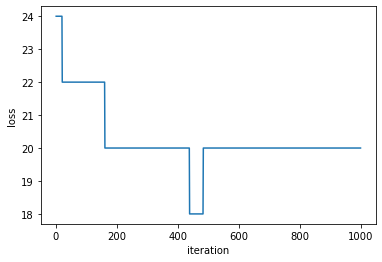

In [7]:
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

Look at the prediction accuracy on training and test data. They're really poor.

In [8]:
y_pred = model.prediction(X_train, model.weights)
print(f'Perceptron, training accuracy score = {accuracy_score(y_train, y_pred)}')

y_pred_test = model.prediction(X_test, model.weights)
print(f'Perceptron, test accuracy score = {accuracy_score(y_test, y_pred_test)}')

Perceptron, training accuracy score = 0.8969072164948454
Perceptron, test accuracy score = 0.9393939393939394


Take a look at the decision boundary created by perceptron. Indeed a linear boundary is a good idea for this data set.

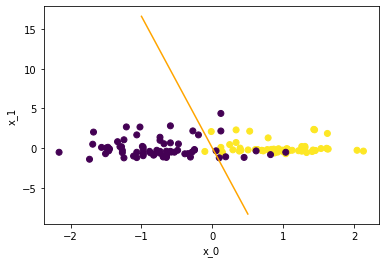

In [9]:
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:,1], c=y)

domain = np.arange(-1., 1.0, 0.5)
w = model.weights
line = [-(w[1:2]*x)/w[0] for x in domain]

plt.plot(domain, line, label='separetor', color = 'orange')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

Calculate the confusion matrix of test data.

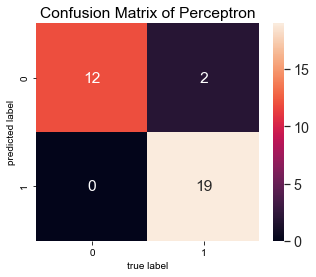

In [10]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix of Perceptron')
ax.set_xlabel('true label', fontsize=10)
ax.set_ylabel('predicted label', fontsize=10)
plt.show()